In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

# load data

In [50]:
whiskies_df=pd.read_csv('whiskies_2021-01-24.csv',engine='python')
review_df=pd.read_csv('reviews_2021-01-24.csv',engine='python')

In [51]:
whiskies_df.id.max()

20140

In [52]:
round((whiskies_df.isna().sum()/len(whiskies_df))*100,1)

Overall rating        0.0
votes                 8.2
Category              0.0
Distillery            4.2
Bottler               0.0
Bottling serie       17.0
Vintage              18.4
Bottled              16.6
Stated Age           21.2
Casknumber           49.6
Strength              0.0
Size                  0.0
Added on              0.0
Average value         0.0
id                    0.0
tastingtags           0.0
Casktype             42.1
Number of bottles    46.7
Barcode              86.9
vote                 91.8
Label                92.2
Bottle code          88.2
Bottled for          93.2
Calculated age       97.4
Distilleries         99.8
dtype: float64

## prep data

In [54]:
cask_words=whiskies_df['Casktype'].str.split("[^\w+]").explode().tolist()
cask_words=pd.DataFrame.from_dict(Counter(cask_words), orient='index').reset_index()
cask_words=cask_words.sort_values(by=0, ascending=False)

whiskies_df['Vintage_year']=whiskies_df['Vintage'].str.extract(r'([0-9]{4})')
whiskies_df['Currency']=whiskies_df['Average value'].apply(lambda x: '€' if '€' in x else '£' if '£' in x else '$' if '$' in x else 'unknown')
whiskies_df['Average value']=whiskies_df['Average value'].str.replace('€ ','').str.replace('£ ','').astype(float)
whiskies_df.rename(columns={'id':'whisky_id'}, inplace=True)
whiskies_df['Stated Age']=whiskies_df['Stated Age'].str.split(expand=True)[0].fillna(0).astype(int)

enriched=review_df.merge(whiskies_df, on='whisky_id', how='left')

In [103]:
enriched[~enriched.vote.isna()].transpose().isna().sum().sort_values()

7901      6
1809      7
25238     8
3611      8
17890     9
         ..
3730     21
19246    21
16940    21
25192    21
14655    21
Length: 235, dtype: int64

In [105]:
enriched.iloc[7901].reset_index()

,index,7901
0,user_id,DarrenHJA
1,whisky_id,8982
2,points_overall,85.0
3,nose_text,"Mild fresh cream, raisins, sunflower oil, gree..."
4,taste_text,"Medium in depth with a dry sherry to boot, oak..."
5,finish_text,"Short, dry and lacking in anything from the no..."
6,nose_rating,87.0
7,taste_rating,85.0
8,finish_rating,82.0
9,Overall rating,85.00/100


In [94]:
enriched.head(3).transpose()

,0,1,2
user_id,sengaia,hs305,Hvdree
whisky_id,4961,4961,4961
points_overall,88.0,88.0,87.0
nose_text,NaN,NaN,NaN
taste_text,NaN,NaN,NaN
finish_text,NaN,NaN,NaN
nose_rating,NaN,NaN,87.0
taste_rating,NaN,NaN,87.0
finish_rating,NaN,NaN,88.0
Overall rating,87.60/100,87.60/100,87.60/100


# EDA

In [55]:
sorting=('whisky_id','<lambda>')
sorting=('Average value','mean')
minimum_reviews=5

reviewer_stats=enriched.groupby('user_id').agg({
    'whisky_id': lambda x:x.nunique(),
    'Average value': ['min','mean','max'],
    'points_overall': ['min','mean','max']
}).sort_values(by=sorting,ascending=False)

In [56]:
top_reviewers=reviewer_stats[reviewer_stats[('whisky_id','<lambda>')]>minimum_reviews]

In [57]:
top_reviewers

whisky_id Average value                         points_overall  \
               <lambda>           min          mean       max            min   
user_id                                                                        
Jazzhawk             17        650.00  13301.711176  65000.00           95.0   
XorLophaX             9        157.00   9988.702222  39500.00           80.0   
maurisso              7         94.47   9532.028571  65000.00           85.0   
Povl77                7       1954.18   8395.104286  31324.50           95.0   
prz22                15        176.00   7235.967333  22569.64           75.0   
...                 ...           ...           ...       ...            ...   
Gweddry              12         24.73     51.136667    133.00           80.0   
whiskeyjedi           6         20.00     50.443333    100.00           30.0   
Teomarg              14         24.73     48.894000     91.66           79.0   
Laugenbretzel        14         16.20     41.364286     89.00           72.0   
Svjatogor            10         16.63     31.693000     59.08           28.0   

                                 
                    mean    max  
user_id                          
Jazzhawk       96.176471   99.0  
XorLophaX      90.888889   98.0  
maurisso       87.333333   91.0  
Povl77         95.714286   98.0  
prz22          95.333333  100.0  
...                  ...    ...  
Gweddry        82.750000   86.0  
whiskeyjedi    67.800000   81.0  
Teomarg        84.000000   87.0  
Laugenbretzel  78.071429   84.0  
Svjatogor      59.800000   76.0  

[607 rows x 7 columns]

In [58]:
distillery_metrics=whiskies_df[whiskies_df['Stated Age']!=0].groupby(['Distillery','Stated Age']).agg({
    'Average value':'mean',
    'whisky_id':lambda x: x.nunique()
})
distillery_metrics=round(distillery_metrics.sort_values(by='whisky_id', ascending=False).sort_values(by='Average value',ascending=False),2)

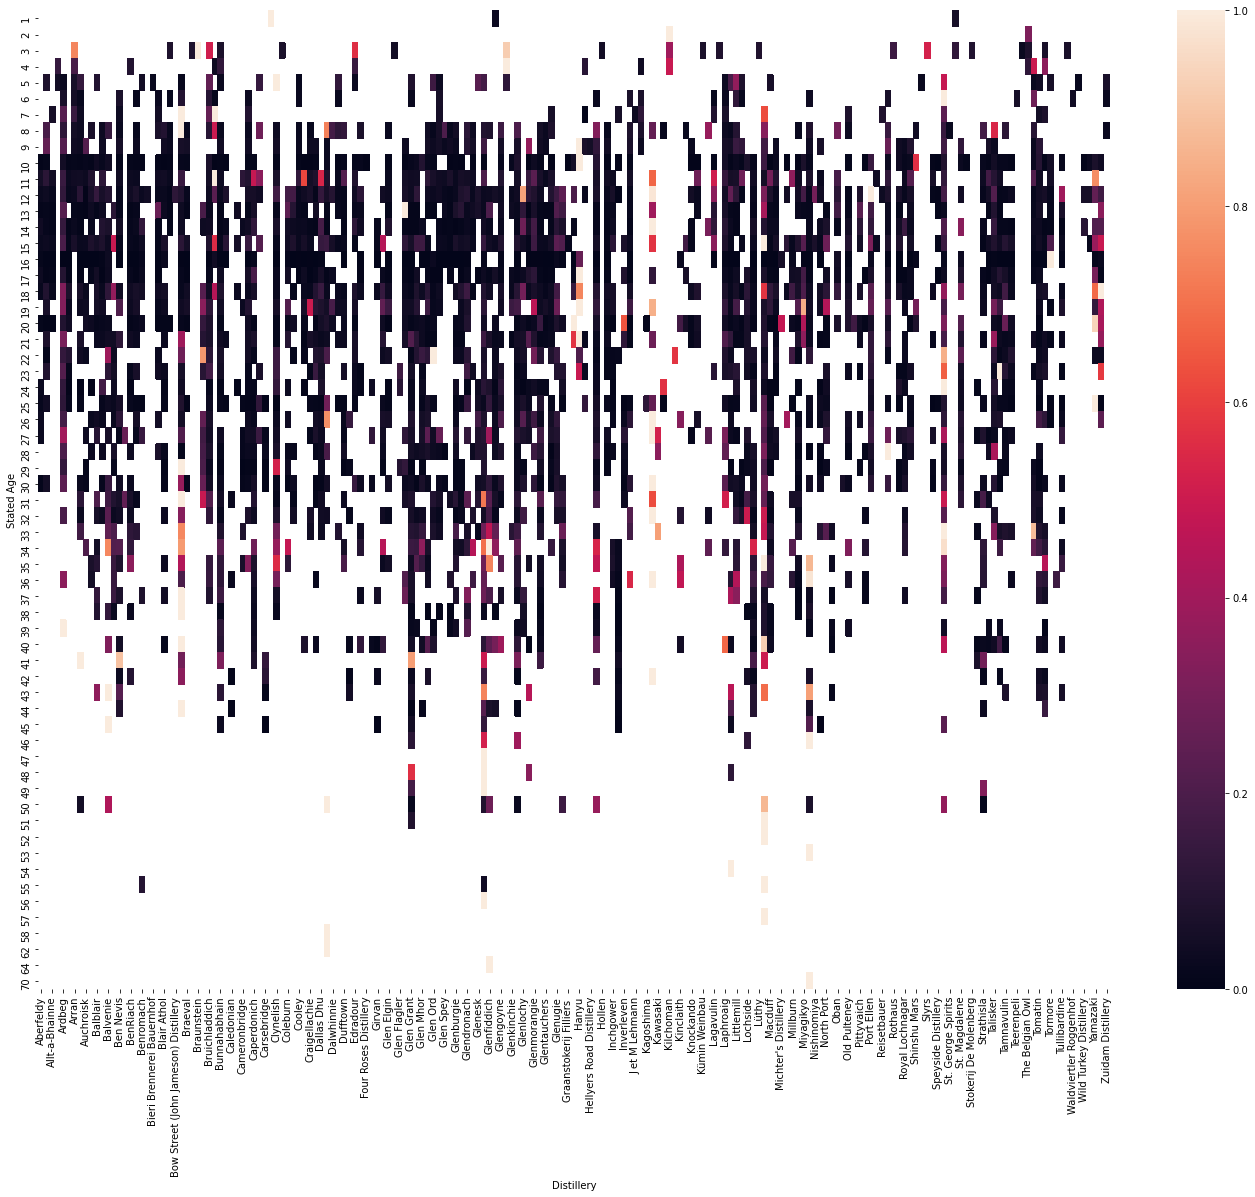

In [64]:
fig,ax = plt.subplots(figsize=(24,18))
pvt=distillery_metrics.unstack(1)['Average value'].transpose()
normed_pvt=pvt.div(pvt.max(axis=1), axis=0)
ax=sns.heatmap(normed_pvt);

In [81]:
distillery_rank=normed_pvt.mean().sort_values().reset_index().rename(columns={0:'mean'}).merge(normed_pvt.count().reset_index(), on='Distillery').rename(columns={0:'count'})

In [89]:
distillery_rank.quantile([0.3,0.5,0.9])

,mean,count
0.3,0.045556,6.0
0.5,0.072173,13.0
0.9,0.251119,27.0


In [92]:
distillery_rank[distillery_rank['count']>5].tail(30)

,Distillery,mean,count
144,Glenugie,0.125074,17
145,Highland Park,0.125682,34
146,Tobermory,0.127430,21
147,Glenlochy,0.132430,20
148,Glenmorangie,0.134584,17
149,Laphroaig,0.135481,26
150,Talisker,0.137313,25
151,Clynelish,0.138408,32
152,Rosebank,0.144718,20
155,Lagavulin,0.165726,10


In [34]:
enriched.columns

Index(['user_id', 'whisky_id', 'points_overall', 'nose_text', 'taste_text',
       'finish_text', 'nose_rating', 'taste_rating', 'finish_rating',
       'Overall rating', 'votes', 'Category', 'Distillery', 'Bottler',
       'Bottling serie', 'Vintage', 'Bottled', 'Stated Age', 'Casknumber',
       'Strength', 'Size', 'Added on', 'Average value', 'tastingtags',
       'Casktype', 'Number of bottles', 'Barcode', 'vote', 'Label',
       'Bottle code', 'Bottled for', 'Calculated age', 'Distilleries',
       'Vintage_year'],
      dtype='object')

In [35]:
sample=enriched.groupby('whisky_id').agg({
    'Average value': 'mean',
    'Stated Age': 'mean',
    'points_overall': 'mean',
    'nose_rating':'mean',
    'taste_rating':'mean',
    'finish_rating':'mean'
})

In [38]:
sample

,Average value,Stated Age,points_overall,nose_rating,taste_rating,finish_rating
whisky_id,,,,,,
4961,40.000,12.000,87.500,86.000,86.000,88.000
4964,120.470,0.000,83.000,NaN,NaN,NaN
4967,113.880,10.000,86.000,NaN,NaN,NaN
4969,70.000,25.000,88.000,NaN,NaN,NaN
4971,60.000,17.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
20130,NaN,NaN,94.000,NaN,NaN,NaN
20133,NaN,NaN,89.000,NaN,NaN,NaN
20136,NaN,NaN,85.667,89.000,87.000,88.000


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average value', ylabel='Density'>

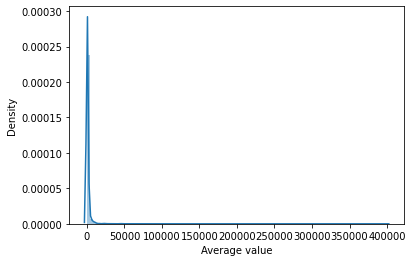

In [36]:
sns.distplot(sample['Average value'], bins=100)

In [37]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


 mu = 700.53 and sigma = 1564.04



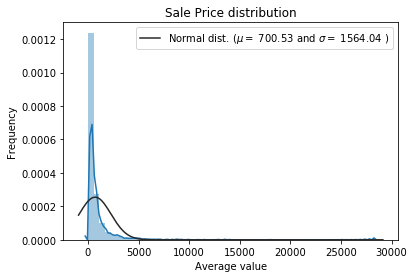

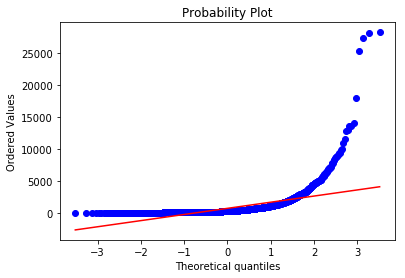

In [30]:
sns.distplot(sample['Average value'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(sample['Average value'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(sample['Average value'], plot=plt)
plt.show();


 mu = 5.66 and sigma = 1.26



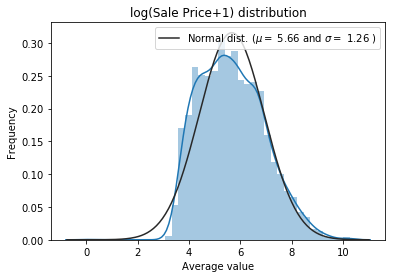

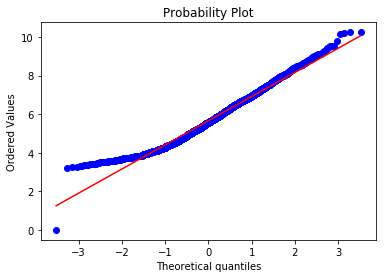

In [33]:
sns.distplot(np.log1p(sample['Average value']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(sample['Average value'] ))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(Sale Price+1) distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(sample['Average value'] ), plot=plt)
plt.show();

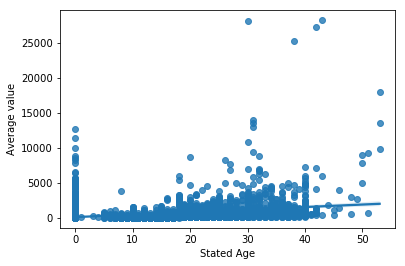

In [25]:
sns.regplot(data=sample,x='Stated Age',y='Average value')

# RQ: Who are the reviewers of top whiskies?

In [ ]:
sample.sort_values(by='Average value',ascending=False)

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

https://towardsdatascience.com/a-brief-introduction-to-xgboost-3eaee2e3e5d6